# 🏥 Predictive Health Insurance Model – Phase 1 (MVP)

### 🧠 Project Overview
The **Predictive Health Insurance Model** aims to help **Shield Insurance** estimate individual health insurance premiums based on:
- **Age**
- **Semi-occasional / high-inhibit habits (e.g., smoking, alcohol)**
- **BMI**
- **Medical history**

This project is developed in collaboration with **AtliQ AI** and consists of two main phases:

1. **Phase 1 – MVP Development**  
   Build and deploy a predictive regression model with an interactive Streamlit web app.  
2. **Phase 2 – Infrastructure Development**  
   Establish a straight-through process (STP) for insurance quotes *(to be planned later)*.

---

### 🎯 Phase 1 Objective
- ✅ Develop a **high-accuracy predictive regression model** with at least **95% accuracy**.  
- ✅ Ensure that for **97% of predictions**, the **percentage difference between predicted and actual premium** is **less than 10%**.  
- ✅ Deploy the model in the **cloud**, enabling underwriters to access it securely from anywhere.  
- ✅ Build an **interactive Streamlit application** for real-time premium prediction.

---

### ⚙️ Scope of Work
1. **📊 Data Collection & Preprocessing**
   - Gather and clean labeled health insurance datasets.
   - Handle missing data, outliers, and categorical encodings.
   - Perform exploratory data analysis (EDA) to understand variable relationships.

2. **🤖 Model Development**
   - Train and evaluate multiple regression models (e.g., Linear Regression, Random Forest, XGBoost).
   - Tune hyperparameters to achieve the highest possible accuracy.
   - Select and finalize the best-performing model.

3. **☁️ Model Deployment**
   - Deploy the optimized model on a **cloud platform** (e.g., AWS, Azure, or GCP).
   - Implement proper **API endpoints** for integration with the Streamlit app.
   - Ensure **security, scalability, and low-latency predictions**.

4. **💻 Streamlit Application**
   - Create a **user-friendly interface** for underwriters.
   - Allow users to input customer data and instantly view predicted premiums.
   - Include visualizations, confidence intervals, and logs for transparency.

5. **🧪 Testing & Validation**
   - Conduct rigorous testing using real-world and synthetic data.
   - Validate model performance and reliability under various input scenarios.

6. **📚 Documentation & Training**
   - Provide comprehensive documentation for model usage and API integration.
   - Conduct training sessions for underwriters and stakeholders.

---

### 📦 Deliverables
- 🎯 **Trained & validated regression model**  
- ☁️ **Deployed cloud model with API access**  
- 💻 **Streamlit application for underwriters**  
- 📘 **Documentation and technical report**  
- 🧑‍🏫 **Training materials & usage guide**

---

### ✅ Phase 1 Acceptance Criteria
| Criteria | Description |
|:--|:--|
| 🚀 **Successful Deployment** | Model and Streamlit application deployed and accessible in the cloud |
| 📈 **Accuracy Requirement** | Model achieves ≥ **97% accuracy** |
| 📊 **Prediction Precision** | ≥ **95%** of predictions within **±10%** of actual premiums |
| 👩‍💼 **Application Usability** | Application tested and confirmed **usable by underwriters** |
| 🧾 **Documentation Delivered** | All supporting documentation and training materials completed |

---

### 🗓️ Project Timeline (Phase 1)
| Stage | Duration |
|:--|:--|
| Data Collection & Preprocessing | 2 weeks |
| Model Development & Evaluation | 4 weeks |
| Deployment & App Development | 3 weeks |
| Testing, Validation & Training | 2 weeks |

---

### 👥 Project Team
| Role | Name |
|:--|:--|
| Data Scientist| **Javidan Akbarov** |


---

> 💡 **Note:**  
> This notebook focuses on **Phase 1 (MVP)**, which covers everything from **data preparation** to **model deployment and app integration**.  
> Phase 2 (STP automation) will be planned and executed once the MVP is validated in production.


In [3]:
# Let's start adding important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

import warnings
warnings.filterwarnings('ignore')

**Let's Load our data to have some insights**

In [4]:
df = pd.read_excel('premiums_young_with_gr.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [5]:
df.sample(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
10892,19,Male,Northwest,Unmarried,0,Obesity,Regular,Salaried,25L - 40L,28,No Disease,Bronze,9205,4
16281,22,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,5,Diabetes,Bronze,5670,1
15515,20,Male,Southwest,Unmarried,0,Normal,Regular,Freelancer,> 40L,44,No Disease,Silver,8556,0


--------------------------------------------------------------------------------
### First of all, let's start by treating our column names. Right they contain `white spaces` amd their `letter-case` si kinda bothering. For example - `Medical History` - `medical-history`. We are going to make it `snake-case` and better reading.

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


<h2 align="center" style="color:blue">Exploratory Data Analysis & Data Cleaning</h2>

In [8]:
df.shape

(20096, 14)

**Handling the missing values**

In [9]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [11]:
# Let's check for duplicates and even though they dont exist we will treat them so we wont have any surprise if new data comes.
df.duplicated().sum()

np.int64(0)

In [12]:
# Handling duplicates anyways
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


**Let do some data cleaning: number_of_dependants sicne it has negative values.**

In [14]:
df.number_of_dependants.value_counts()

number_of_dependants
 0    10856
 1     5467
 2     2231
 3     1514
-3       12
-1       10
Name: count, dtype: int64

In [15]:
df.number_of_dependants.unique()

array([ 0,  2,  1,  3, -3, -1])

In [16]:
df[df.number_of_dependants < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
150,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309,2
871,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095,0
906,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641,1
2462,20,Male,Northeast,Unmarried,-3,Underweight,Regular,Freelancer,10L - 25L,20,Diabetes,Silver,9640,1
3059,20,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Salaried,> 40L,77,No Disease,Silver,9299,2
3120,25,Male,Northwest,Unmarried,-1,Underweight,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,7234,3
3780,23,Female,Southeast,Unmarried,-3,Normal,Regular,Freelancer,25L - 40L,40,No Disease,Bronze,5003,0
5593,25,Male,Northwest,Unmarried,-1,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6299,2
7585,22,Male,Northwest,Unmarried,-3,Normal,Occasional,Self-Employed,<10L,8,No Disease,Gold,13596,2
9765,18,Female,Southeast,Unmarried,-1,Underweight,No Smoking,Self-Employed,<10L,4,No Disease,Bronze,9366,5


## 🛠 Fixing Negative Values in `number_of_dependants`

Since there are **no missing values** in our `number_of_dependants` column, there’s no need to toss any rows in the trash 🗑 — dropping isn’t the move here.  

Instead, let’s be practical:  
📞 We could talk to the **business owner** or **data collector** to figure out what went wrong.  

But here’s our working assumption:  
⚠️ There was a **data entry mistake** and some values accidentally went **negative**.  

💡 Instead of deleting them, we’ll **keep them** — just **flip** the sign to make them positive ➕.  

In [17]:
df.number_of_dependants = df.number_of_dependants.abs()

In [18]:
df[df.number_of_dependants < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk


In [19]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## 🔍 Let’s mess around with the other numeric columns  

First, I’m gonna grab all the numeric values and check their distributions 📊.  
The goal? See the **spread**, spot any **outliers 🚨**, get a feel for the **range**, and whatever other quirks pop up.  


In [20]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

In [21]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

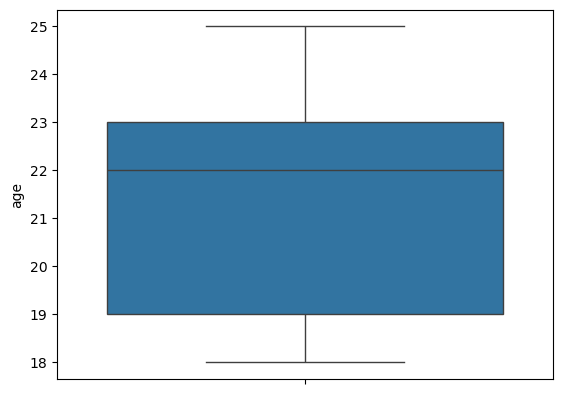

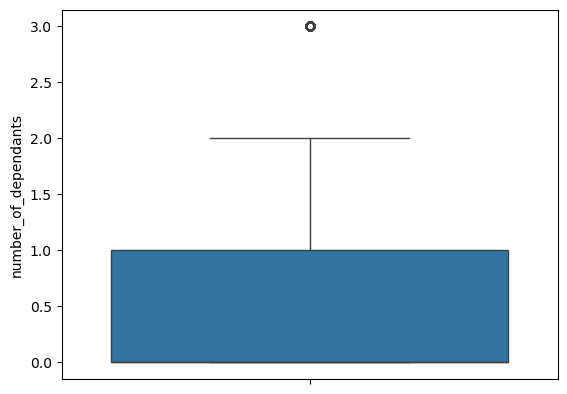

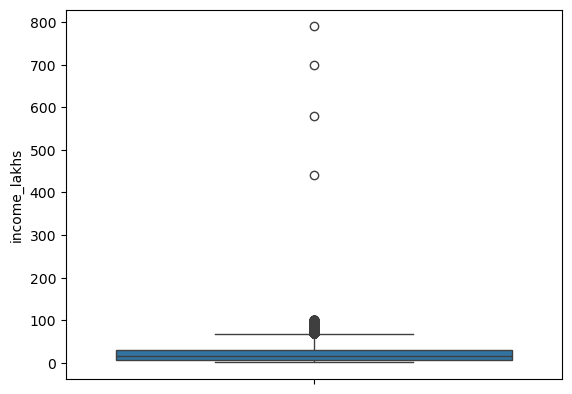

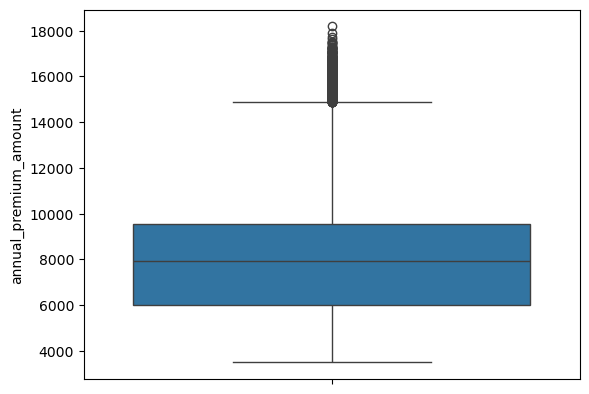

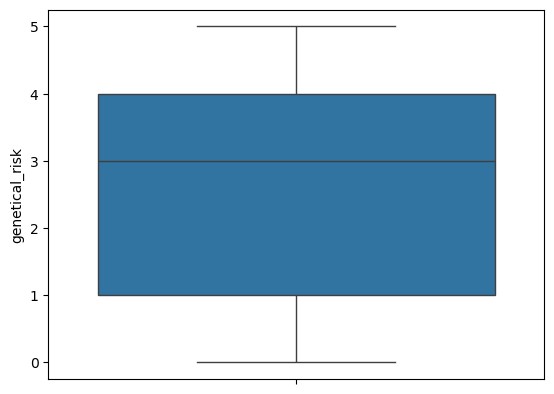

In [22]:
# I wanna draw boxplot(since it is the best for outliers)
for col in numeric_columns:
  sns.boxplot(df[col])
  plt.show()

## 📊 Outlier Notes from the Plots

- **🧓 Age** — Has some *unbelievable* outliers. Like, numbers that make you go *"there’s no way this is real"*.
- **👨‍👩‍👧 Number of Dependents** — Clean. No visible outliers at all.
- **💰 Income (Lakhs)** — Loaded with outliers. Plenty of extreme values here.
- **🎯 Annual Premium Amount (Target)** — A few outliers exist. Since this is the **target column**, we’ll think carefully about whether to treat them or not.


In [23]:
# Let's treat outliers of Age columns

# We are going to use the age of 100 as the baseline
df[df.age > 100].age.value_counts()

Series([], Name: count, dtype: int64)

In [24]:
# Let's have new dataframe without the values more than 100. We will store them in a new dataframe called `df_1`
df_1 = df[df.age <= 100]
df_1.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

In [25]:
# Let's treat outliers of Income column
df.income_lakhs.describe()

count    20090.000000
mean        22.510851
std         23.420493
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        790.000000
Name: income_lakhs, dtype: float64

In [26]:
# Let's calculate the iqr bounds in order to define the outliers
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return lower_bound, upper_bound


lower, upper = get_iqr_bounds(df_1.income_lakhs)
lower, upper

(-31.5, 68.5)

In [27]:
df_1[df_1.income_lakhs > upper].shape

(1295, 14)

In [28]:
quantile_threshold_after_discussion = df_1.income_lakhs.quantile(0.999) # the value we put between parathnesis is the value that controls the max and min values of income_lakhs. if we use 1 we gon get the max value which is 930 and if we use 0 we gon get the 1 as the min value for income_lakhs. use describe() method on income_lakhs and investiage
quantile_threshold_after_discussion

np.float64(100.0)

In [29]:
df_1[df_1.income_lakhs > quantile_threshold_after_discussion].shape

(4, 14)

In [30]:
df_2 = df_1[df_1.income_lakhs <= quantile_threshold_after_discussion].copy()
df_2.shape

(20086, 14)

In [31]:
df_2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


## 💸 Handling Outliers in `income_lakhs`

When we were dealing with outliers, we hit a wall on the **`income_lakhs`** column.  
The **IQR** method told us the upper bound was **67.000000 lakhs** (≈ $80,000/year).  

But here’s the problem:  
- In reality, annual incomes can easily be **more than $80k** for many people.
- If we blindly used 67 lakhs as the cutoff, we’d be throwing out **~4,000 rows** — people with perfectly normal annual salaries.

After some domain thinking 🤔 and a chat with the business folks 🗣️, we decided to set the upper bound to **100.000000 lakhs** (≈ $120,000/year).  

**Result:**  
✅ Row loss went from **~4,000** to just **10** — and those 10 were clearly extreme cases.  


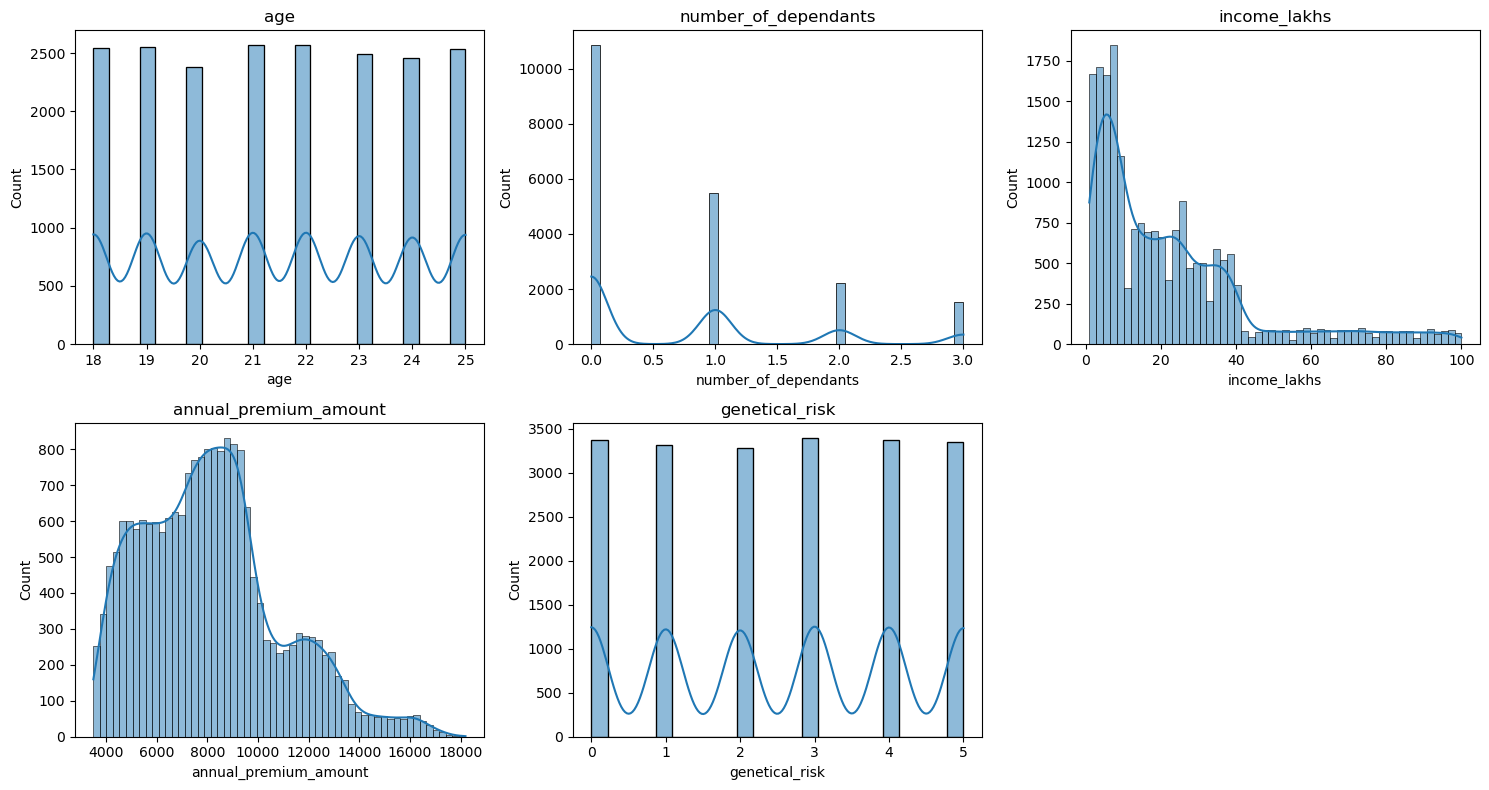

In [32]:
# let's plot all numeric values and do univariate analysis after cleaning our dataset. Cleaned dataset is df_2. We're going use histplot for observing distribution
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # Changed to 2x3 grid
axs = axs.flatten()  # Flatten to make indexing easier

for i, column in enumerate(numeric_columns):
    sns.histplot(df_2[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

# Hide the extra subplot (6th position) since you only have 5 columns
if len(numeric_columns) < len(axs):
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

In [33]:
df_2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


### Bivariate Analysis: Numeric Columns

In [34]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

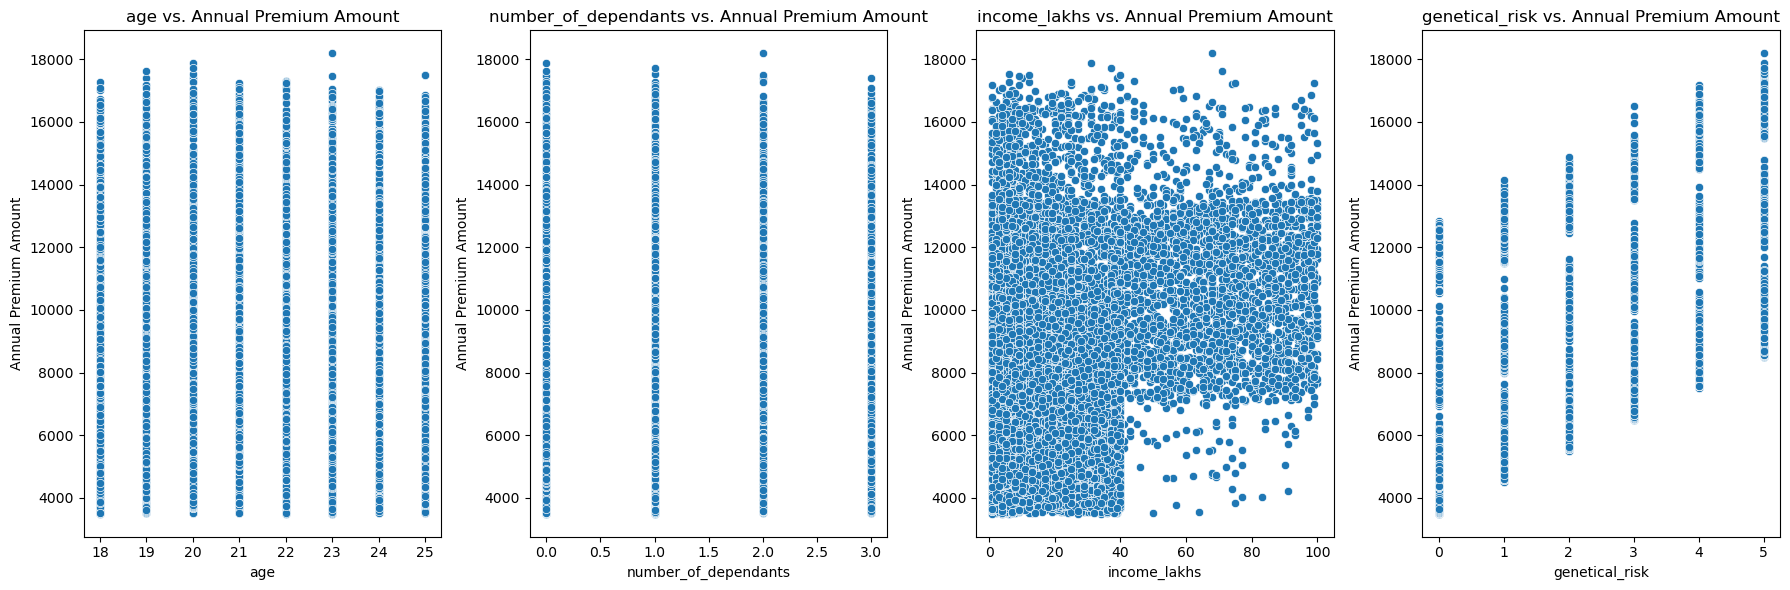

In [36]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs', 'genetical_risk']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df_2[column], y=df_2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

## 2. Categorical Columns

In [37]:
categorical_columns = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']

for col in categorical_columns:
  print(f'{col}: {df_2[col].unique()}')

gender: ['Male' 'Female']
region: ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status: ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history: ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan: ['Silver' 'Bronze' 'Gold']


In [38]:
df_2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df_2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

### Univariate Analysis

In [39]:
df_2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [40]:
pct_count = df_2.gender.value_counts(normalize=True)*100
pct_count

gender
Male      55.038335
Female    44.961665
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

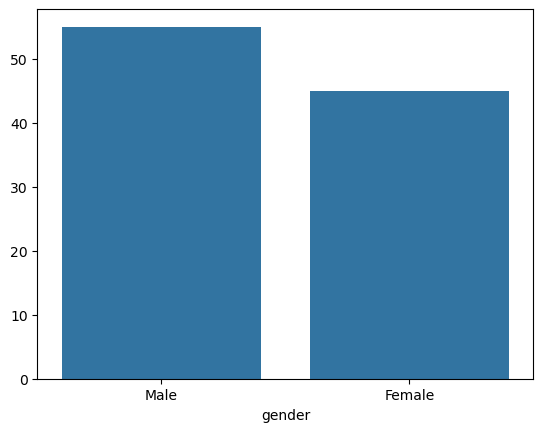

In [41]:
sns.barplot(x=pct_count.index, y=pct_count.values)

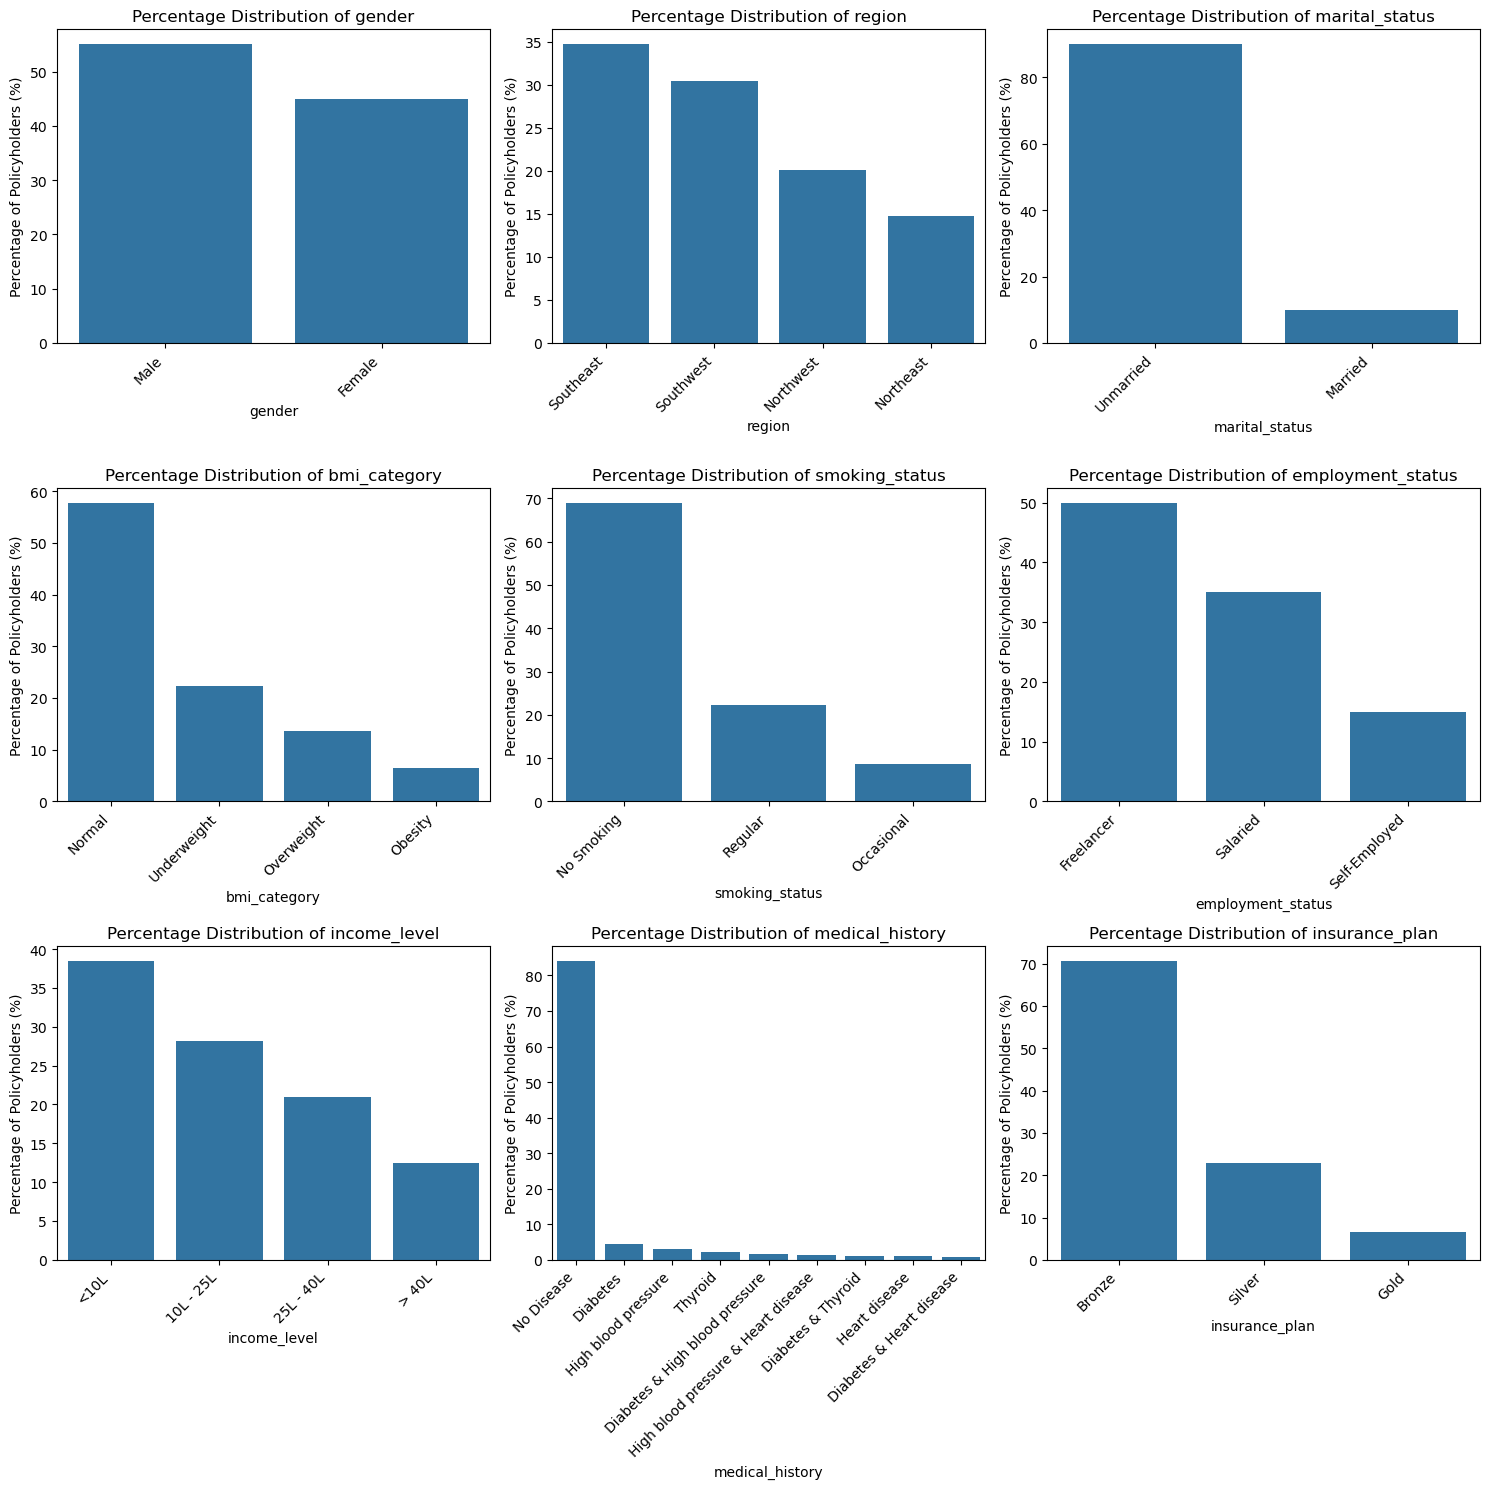

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, column in zip(axes, categorical_columns):
    category_counts = df_2[column].value_counts(normalize=True) * 100

    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)

    # Rotate and align x-axis labels
    ax.tick_params(axis='x', rotation=45)  # rotate labels 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')  # align to the right so they don't overlap

plt.tight_layout()
plt.show()


### Bivariate Analysis

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


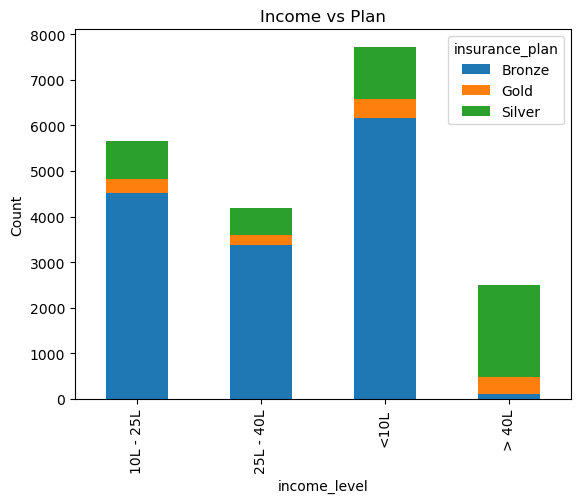

In [45]:
# Cross-tabulation of income_level and insurance_plan
cross_tab = pd.crosstab(df_2['income_level'], df_2['insurance_plan'])
print(cross_tab)

# Plotting the crosstab
cross_tab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

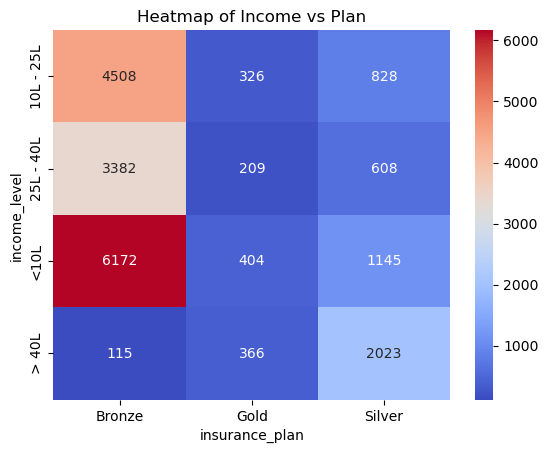

In [46]:
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center" style="color:blue">Feature Engineering</h2>

In [47]:
df_2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [48]:
df_2.medical_history.sample(5)

1976     No Disease
9278       Diabetes
6429       Diabetes
14655    No Disease
7290     No Disease
Name: medical_history, dtype: object

In [49]:
# Let's assume we are given the `risk_scores` so we can replace medical_history values with them

risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df_2[['disease1', 'disease2']] = df_2['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df_2['disease1'].fillna('none', inplace=True)
df_2['disease2'].fillna('none', inplace=True)
df_2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
  df_2['total_risk_score'] += df_2[disease].map(risk_scores)



# Normalize the risk score to a range of 0 to 1
max_score = df_2['total_risk_score'].max()
min_score = df_2['total_risk_score'].min()

df_2['normalized_risk_score'] = (df_2['total_risk_score'] - min_score) / (max_score - min_score)

In [50]:
df_2.sample(30)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
9758,22,Male,Northwest,Unmarried,0,Underweight,Regular,Freelancer,> 40L,57,No Disease,Silver,11806,4,no disease,none,0,0.000000
9484,21,Female,Southeast,Unmarried,0,Underweight,No Smoking,Salaried,25L - 40L,29,No Disease,Bronze,6147,2,no disease,none,0,0.000000
12728,23,Female,Southwest,Unmarried,0,Normal,No Smoking,Self-Employed,25L - 40L,37,No Disease,Bronze,3902,0,no disease,none,0,0.000000
15542,25,Male,Northeast,Married,2,Normal,No Smoking,Freelancer,<10L,6,Diabetes & High blood pressure,Bronze,6327,2,diabetes,high blood pressure,12,0.857143
8995,20,Male,Northeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,4,No Disease,Silver,8811,1,no disease,none,0,0.000000
2979,21,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,14,Diabetes,Bronze,6993,3,diabetes,none,6,0.428571
17506,25,Male,Southwest,Unmarried,1,Normal,Occasional,Salaried,10L - 25L,16,No Disease,Bronze,6408,2,no disease,none,0,0.000000
5560,18,Female,Southeast,Unmarried,1,Obesity,Occasional,Self-Employed,<10L,2,No Disease,Bronze,6382,1,no disease,none,0,0.000000
9863,20,Male,Southeast,Unmarried,2,Underweight,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,5602,2,no disease,none,0,0.000000
4043,20,Male,Southwest,Unmarried,1,Overweight,No Smoking,Freelancer,25L - 40L,37,Diabetes,Bronze,4964,0,diabetes,none,6,0.428571


### Encode Text Columns

In [51]:
df_2['insurance_plan'] = df_2['insurance_plan'].map({
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3
})

In [52]:
df_2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [53]:
df_2['income_level'] = df_2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [54]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df_3 = pd.get_dummies(df_2, columns=nominal_cols, drop_first=True, dtype=int)
df_3.head(5)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [55]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20086 entries, 0 to 20095
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20086 non-null  int64  
 1   number_of_dependants             20086 non-null  int64  
 2   income_level                     20086 non-null  int64  
 3   income_lakhs                     20086 non-null  int64  
 4   medical_history                  20086 non-null  object 
 5   insurance_plan                   20086 non-null  int64  
 6   annual_premium_amount            20086 non-null  int64  
 7   genetical_risk                   20086 non-null  int64  
 8   disease1                         20086 non-null  object 
 9   disease2                         20086 non-null  object 
 10  total_risk_score                 20086 non-null  int64  
 11  normalized_risk_score            20086 non-null  float64
 12  gender_Male            

### Feature Selection

In [56]:
df_3.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,normalized_risk_score,gender_Male,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,...,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,2.073982,22.390371,1.359156,8141.799263,2.503883,1.289057,0.092076,0.550383,...,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,2.294248,0.937238,1.042442,21.732062,0.600102,2749.912486,1.710184,3.220220,0.230016,0.497467,...,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,18.000000,0.000000,1.000000,1.000000,1.000000,3501.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,1.000000,6.000000,1.000000,6022.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,0.000000,2.000000,16.000000,1.000000,7939.000000,3.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,1.000000,3.000000,31.000000,2.000000,9561.000000,4.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,25.000000,3.000000,4.000000,100.000000,3.000000,18186.000000,5.000000,14.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_4 = df_3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df_4.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0


### Calculate VIF for Multicolinearity

In [58]:
df_4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

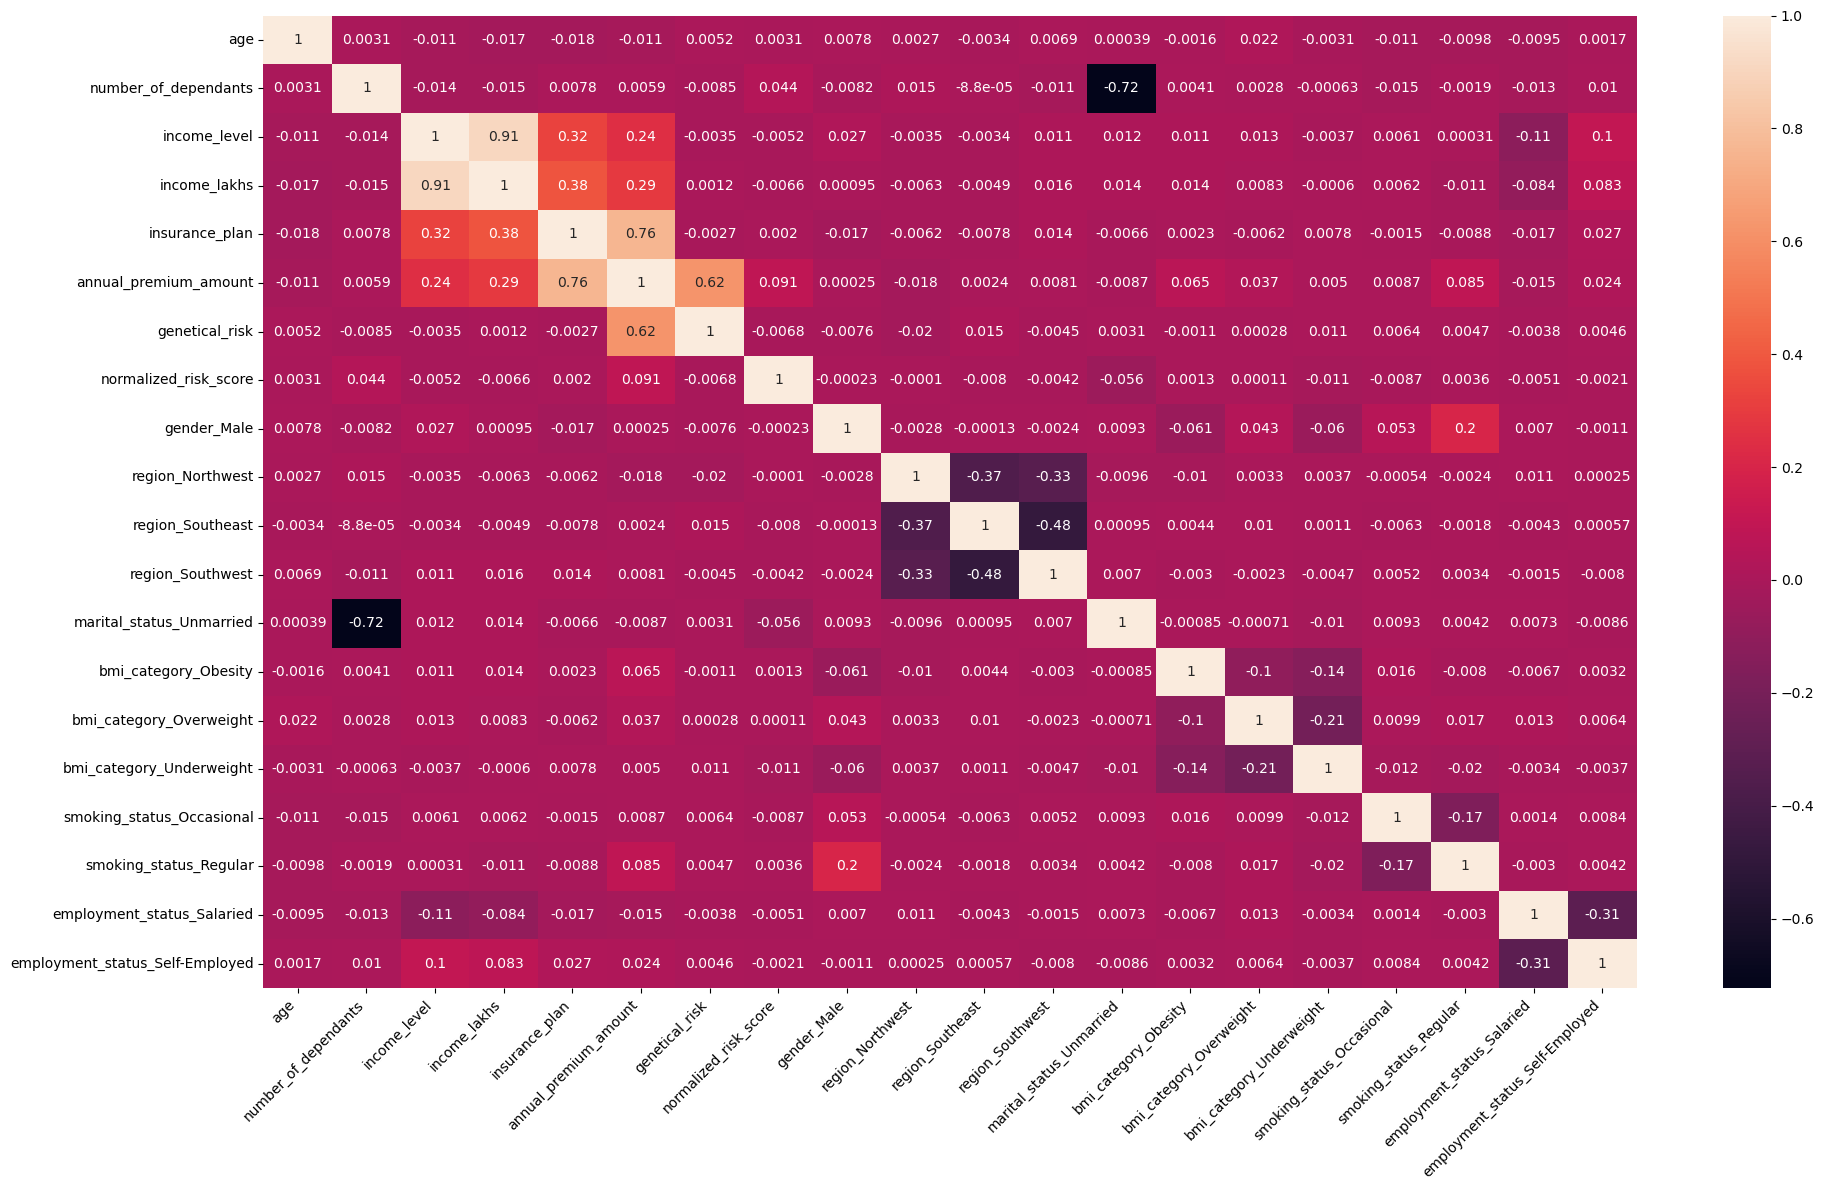

In [59]:
cm = df_4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [60]:
X = df_4.drop('annual_premium_amount', axis='columns')
y = df_4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,2.503883,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,1.710184,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [62]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [66]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [67]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

<h2 align="center" style="color:blue">Model Training</h2>

In [68]:
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=42)

# shape of the X_train, X_test, y_train, y_test features
print('x train: ', X_train.shape)
print('x test: ', X_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (14060, 18)
x test:  (6026, 18)
y train:  (14060,)
y test:  (6026,)


# Linear Regression Model

In [70]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)

print('Test Score: ', test_score)
print('Train Score: ', train_score)

Test Score:  0.9882609305654483
Train Score:  0.9884990017445308


In [71]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print('MSE: ', mse_lr)
print('MAE: ', mae_lr)
print('RMSE: ', rmse_lr)

MSE:  89439.73145260883
MAE:  257.5168223178725
RMSE:  299.06476130197757


In [72]:
X_test.shape

(6026, 18)

In [73]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([  -0.105802,   20.106931,  -11.819294, 6995.645756,  996.735067,
       1131.189849,    6.082099,    1.916428,    2.079741,    8.29849 ,
         14.215531,  801.977884,  404.437286,  113.743592,  207.656492,
        607.368444,    7.089858,    9.304255])

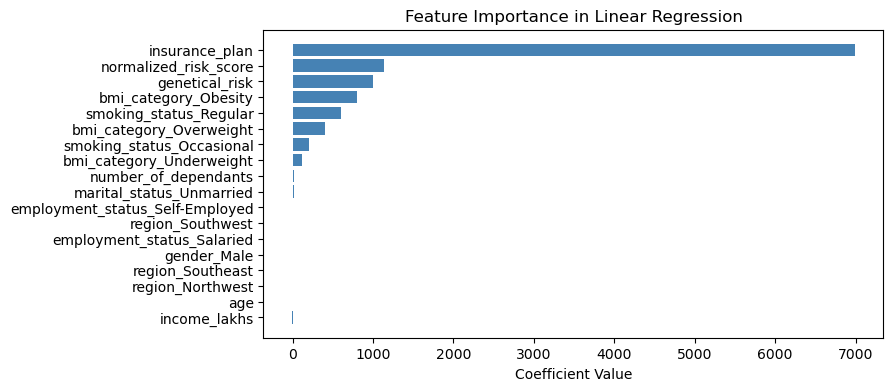

In [74]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression Model

In [75]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9884985406626117, 0.9882597413296532)

In [76]:
y_pred = model_rg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  89448.79221596348 RMSE:  299.0799094154662


### XGBoost

In [77]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score, test_score

(0.9875779747962952, 0.9872627258300781)

In [78]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  97045.09375 RMSE:  311.5206152889404


In [79]:
model_xgb = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9888121684392294)

### LightGBM Model

In [80]:
from lightgbm import LGBMRegressor, LGBMClassifier
model_lgb = LGBMRegressor()
model_lgb.fit(X_train, y_train)
model_lgb.score(X_test, y_test)
train_score = model_lgb.score(X_train, y_train)
test_score = model_lgb.score(X_test, y_test)
train_score, test_score

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 14060, number of used features: 18
[LightGBM] [Info] Start training from score 8129.314011


(0.9898707849579286, 0.9883724847371904)

In [81]:
random_search.best_params_

{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}

In [103]:
best_model = model_lr

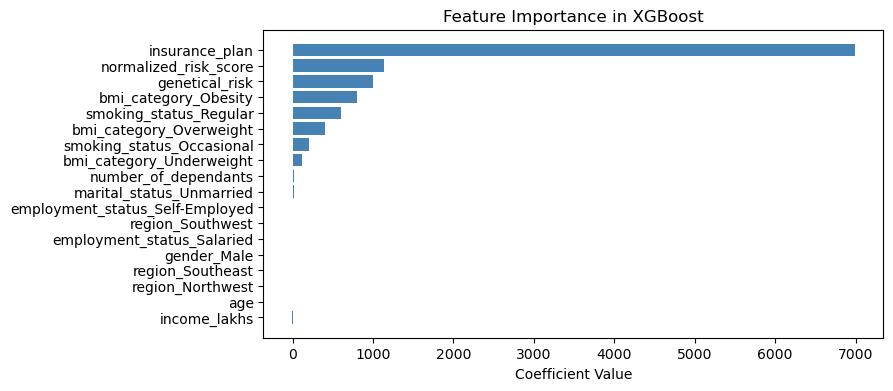

In [107]:
# feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(best_model.coef_, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

# Error Analysis

In [108]:
y_pred = best_model.predict(X_test)
residual = y_pred - y_test

residual_pct = (residual / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'residual': residual,
    'residual_pct': residual_pct
})

results_df.sample(10)

,actual,predicted,residual,residual_pct
8067,6051,5618.927989,-432.072011,-7.140506
6755,12397,12482.048961,85.048961,0.686045
12850,8857,9087.954571,230.954571,2.607594
3290,7069,7493.449498,424.449498,6.004378
3688,7215,6878.886451,-336.113549,-4.658538
19312,8218,7902.982975,-315.017025,-3.833257
13679,5856,5467.619634,-388.380366,-6.632178
18962,7751,7379.702267,-371.297733,-4.790320
5938,9157,8978.013963,-178.986037,-1.954636
14639,6579,6393.096869,-185.903131,-2.825705


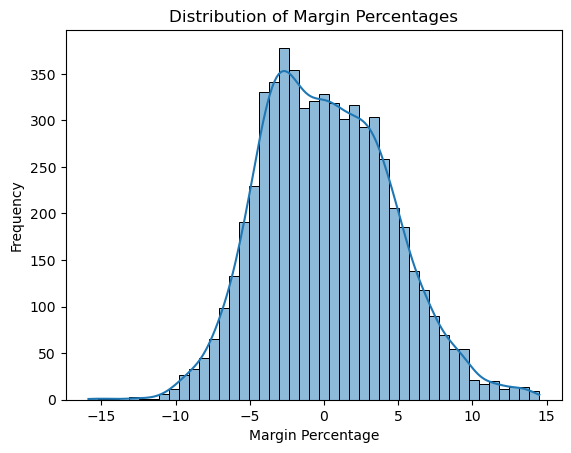

In [109]:
sns.histplot(results_df['residual_pct'], kde=True)
plt.title('Distribution of Margin Percentages')
plt.xlabel('Margin Percentage')
plt.ylabel('Frequency')
plt.show()

In [110]:
# Let's assume we talked to our business owner and we are told that we are only allowed to have margin u until to 10%. Not mroe than that.

# the threshold that is more than 10% will be considered as extreme_error_threshold

extreme_error_threshold = 10

extreme_results_df = results_df[np.abs(results_df['residual_pct']) > extreme_error_threshold]
extreme_results_df.sample(30)

,actual,predicted,residual,residual_pct
16560,3563,4008.999438,445.999438,12.517526
7802,4096,4519.165150,423.165150,10.331180
5310,7149,6255.680214,-893.319786,-12.495731
19739,3805,4307.747712,502.747712,13.212818
9475,4478,3999.410140,-478.589860,-10.687581
3484,4103,4609.337064,506.337064,12.340655
4204,4245,4708.266672,463.266672,10.913231
3127,4640,5105.012135,465.012135,10.021813
7655,3633,4004.002330,371.002330,10.212010
7186,5135,5689.527265,554.527265,10.798973


In [111]:
extreme_results_df.shape

(123, 4)

In [112]:
extreme_errors_percentage = extreme_results_df.shape[0]*100 / X_test.shape[0]
extreme_errors_percentage

2.0411549950215733

In [113]:
X_test.shape

(6026, 18)

We have 30% extreme errors which means for 30% customers we will either overcharge or undercharge by 10% or more

In [114]:
# Let's be even more offensive and see how many percetange of the customers going to be overcharged or undercharged more than 50%
extreme_results_df[abs(extreme_results_df['residual_pct']) > 50].sort_values('residual_pct', ascending=False)

,actual,predicted,residual,residual_pct


There will be more than 500 customers whom we will overcharge or undercharge by more than 50%

In [115]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.000000,0.222222,0.0,0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
13142,0.571429,0.666667,0.070707,0.0,0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0


In [116]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

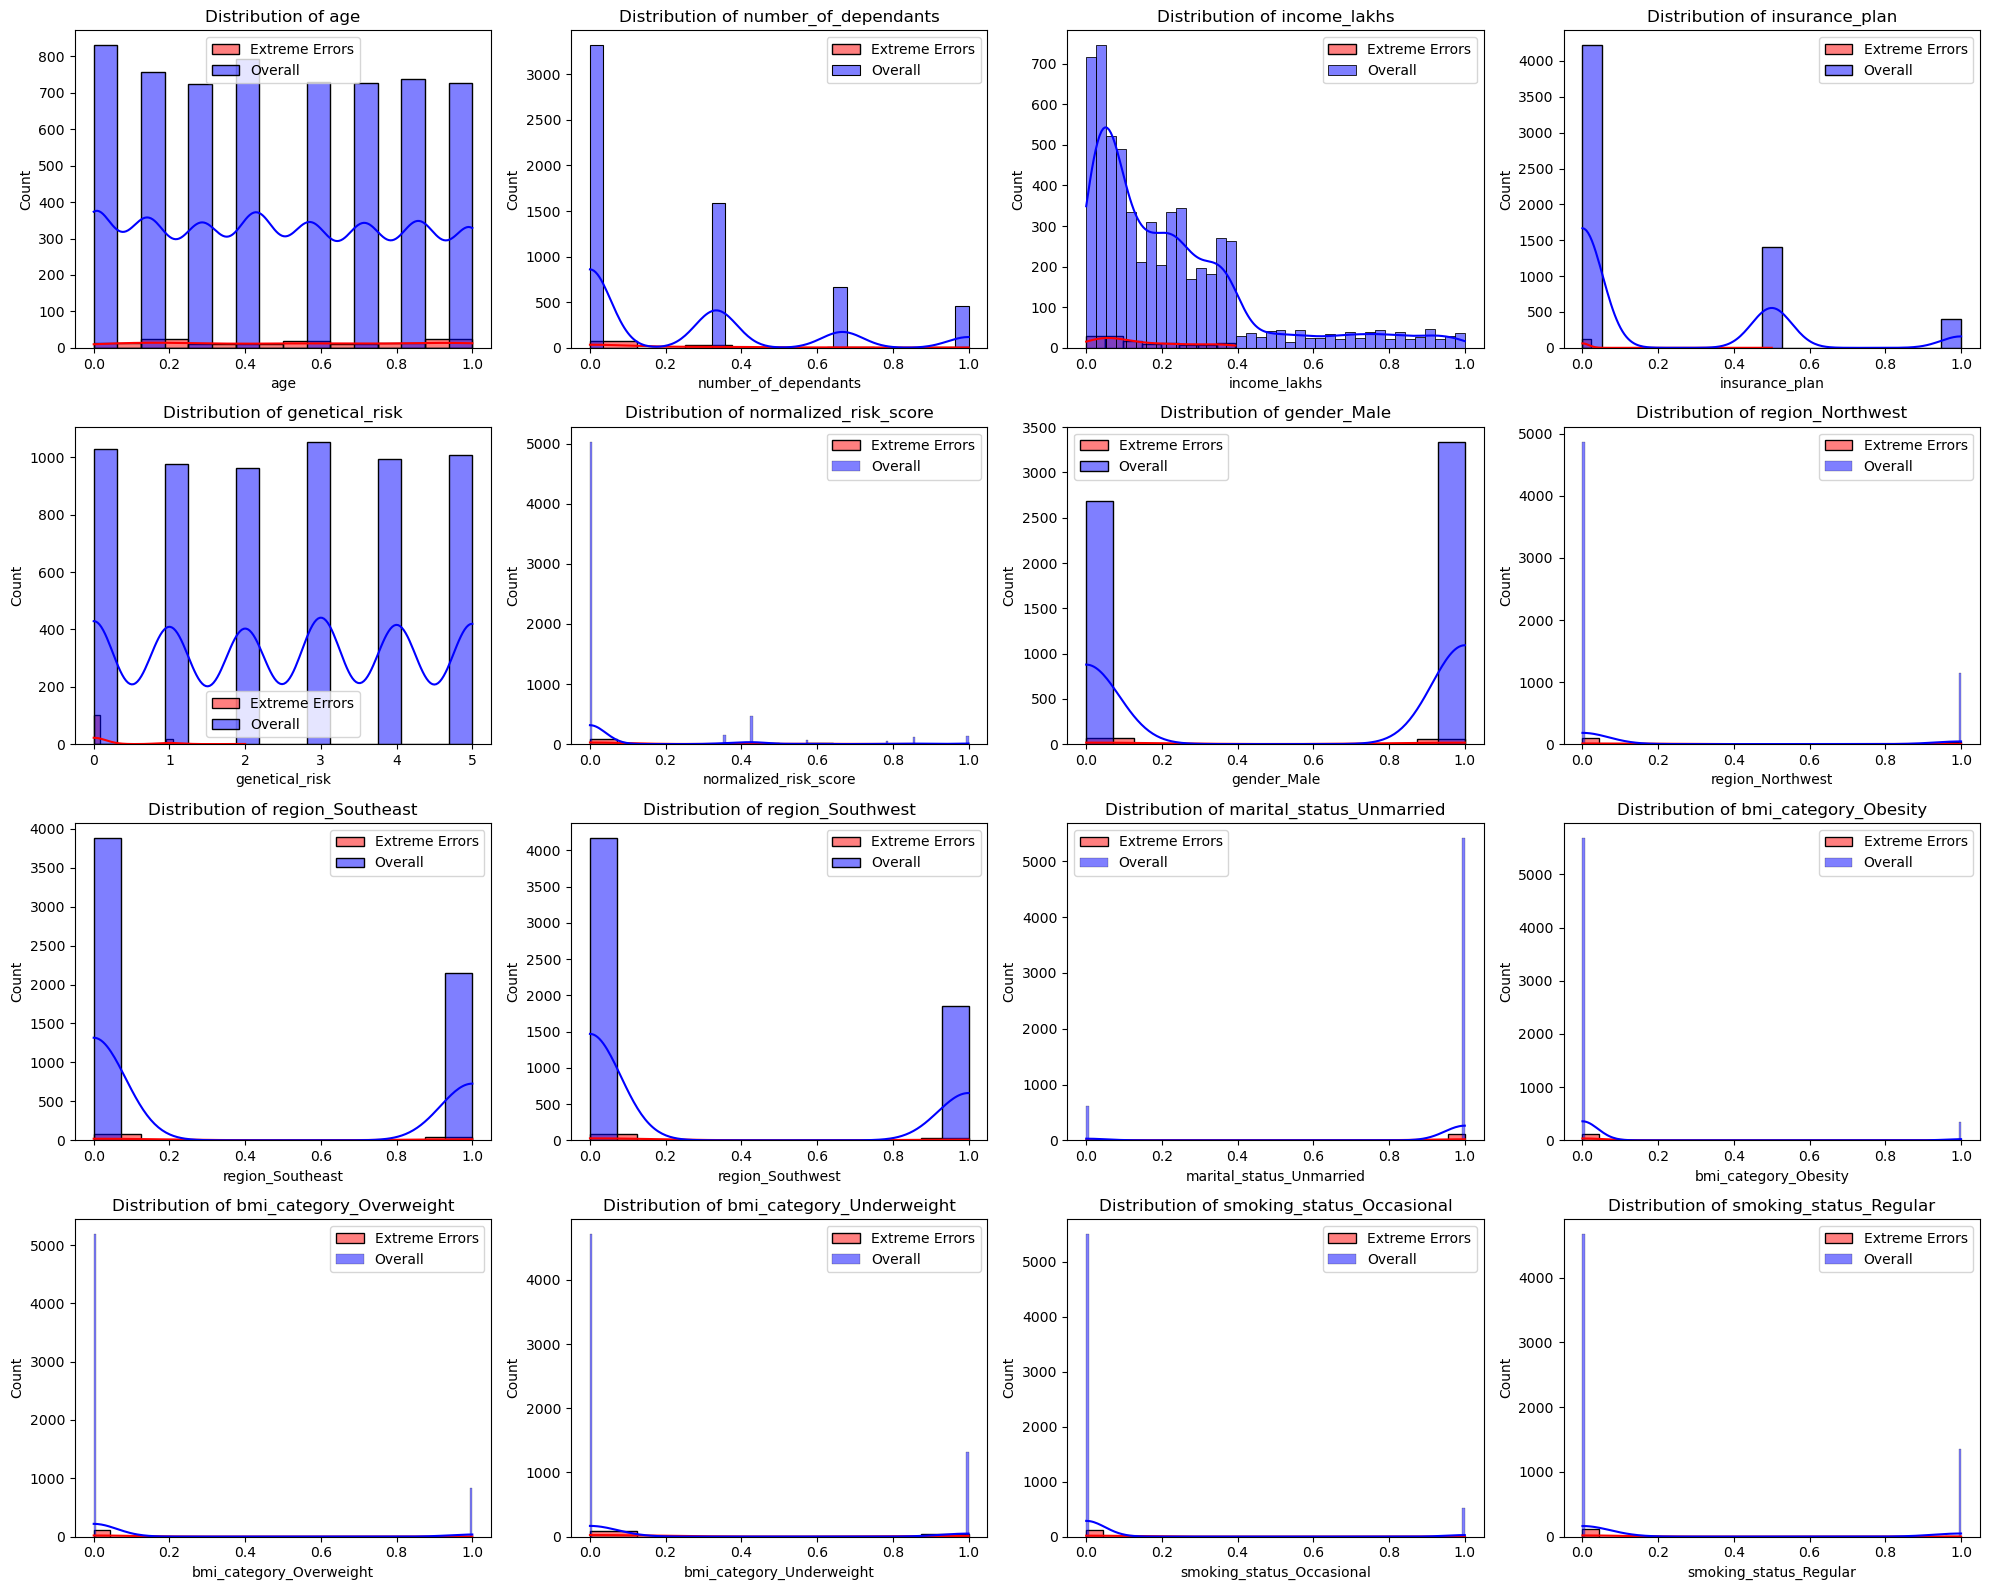

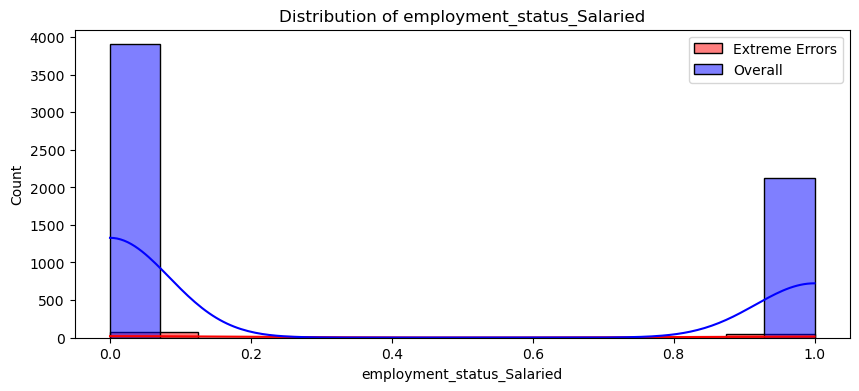

In [117]:
# First 16 graphs in 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, feature in enumerate(X_test.columns[:16]):
    ax = axes[idx]
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True, ax=ax)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True, ax=ax)
    ax.legend()
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# 17th graph separately
plt.figure(figsize=(10, 4))
feature = X_test.columns[16]
sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
plt.legend()
plt.title(f'Distribution of {feature}')
plt.show()

In [118]:
extreme_errors_df['income_level'] = -1

In [119]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,18.0,0.0,-2.0,23.0,1.0
1,22.0,2.0,-2.0,8.0,1.0
2,24.0,3.0,-2.0,3.0,1.0
3,23.0,0.0,-2.0,5.0,1.0
4,25.0,0.0,-2.0,4.0,1.0


In [120]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,123.000000,123.000000,123.0,123.000000,123.000000
mean,21.682927,0.585366,-2.0,15.365854,1.008130
std,2.443852,0.904695,0.0,11.660687,0.090167
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,19.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,12.000000,1.000000
75%,24.000000,1.000000,-2.0,24.000000,1.000000
max,25.000000,3.000000,-2.0,40.000000,2.000000


<Axes: xlabel='age', ylabel='Count'>

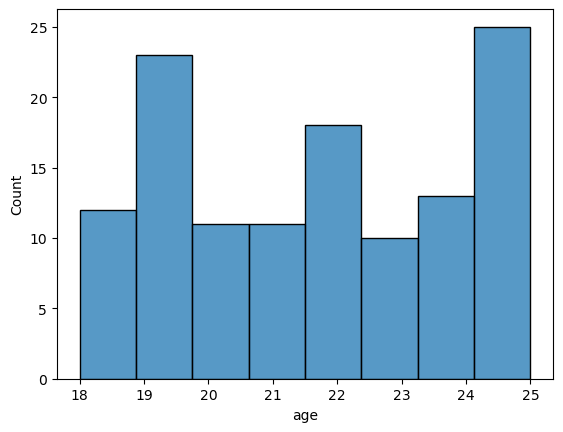

In [121]:
sns.histplot(df_reversed.age)

This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment

In [122]:
df_reversed['age'].quantile(0.999)

np.float64(25.0)

# Export the model

In [124]:
from joblib import dump

In [125]:
dump(best_model, 'artifacts/model_young.joblib')

['artifacts/model_young.joblib']

In [127]:
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scaler': cols_to_scale
}
dump(scaler_with_cols, 'artifacts/scaler_young.joblib')

['artifacts/scaler_young.joblib']

In [128]:
extreme_errors_percentage

2.0411549950215733